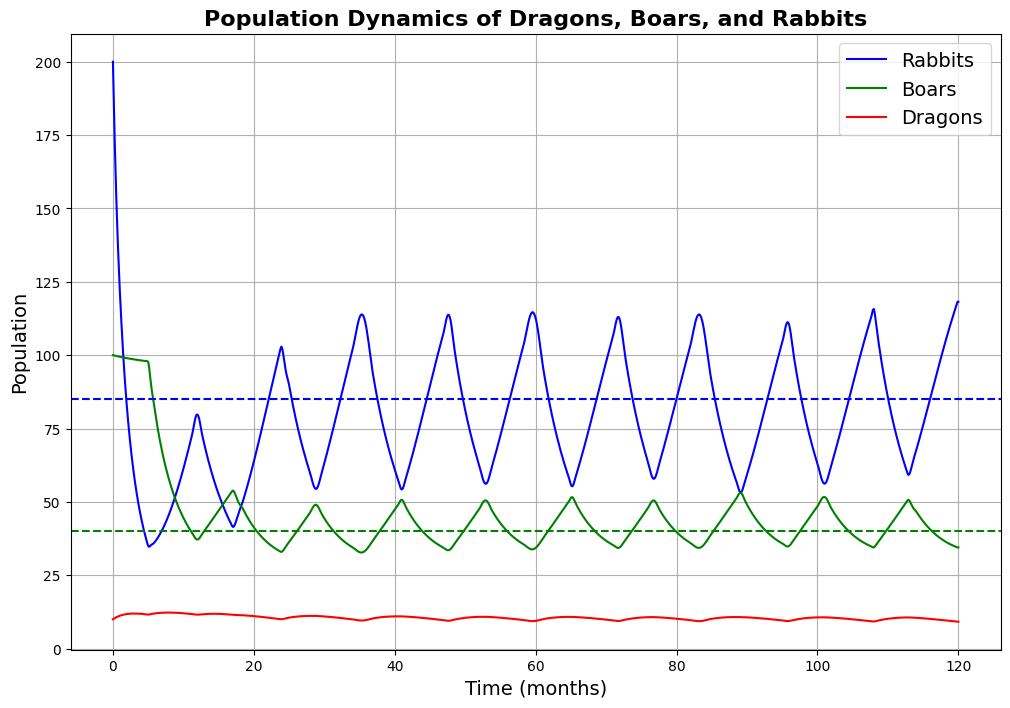

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Seasonal dynamics function
def seasonal_parameters(t):
    month = (t % 12) + 1
    if 1 <= month <= 6:  # Winter
        predation_DR = 0.03  # Dragons predating on Rabbits (winter)
        predation_DB = 0.0    # No Boar predation by Dragons in winter
        rabbit_growth = 0.5   # Higher rabbit growth in winter
        boar_growth = 0.15    # Slower boar growth in winter
    else:  # Summer
        predation_DR = 0.0    # No Rabbit predation by Dragons in summer
        predation_DB = 0.02   # Dragons predating on Boars (summer)
        rabbit_growth = 0.4   # Moderate rabbit growth in summer
        boar_growth = 0.25    # Higher boar growth in summer
    return predation_DR, predation_DB, rabbit_growth, boar_growth

# Lotka-Volterra with logistic growth
def population_dynamics(t, populations):
    R, B, D = populations  # Rabbit, Boar, Dragon populations

    # Seasonal parameters
    predation_DR, predation_DB, rabbit_growth, boar_growth = seasonal_parameters(t)

    # Carrying capacities
    K_R = 200  # Rabbit carrying capacity
    K_B = 100  # Boar carrying capacity
    # K_D = 50   # Dragon carrying capacity

    # Fixed parameters
    rabbit_death_B = 0.003    # Remember that Rabbits also eaten by Boars
    boar_death = 0.006         # Natural boar death rate
    dragon_death = 0.07       # Dragon natural death rate
    dragon_growth_R = 0.04    # Dragons growing from eating Rabbits
    dragon_growth_B = 0.06    # Balanced dragons growing from eating Boars

    # Logistic growth terms
    logistic_R = rabbit_growth * R * (1 - R / K_R)
    logistic_B = boar_growth * B * (1 - B / K_B)

    # Lotka-Volterra equations
    dRdt = logistic_R - rabbit_death_B * R * B - predation_DR * R * D
    dBdt = logistic_B - boar_death * B - predation_DB * B * D
    dDdt = (
        dragon_growth_R * predation_DR * R * D
        + dragon_growth_B * predation_DB * B * D
        - dragon_death * D
    )

    return [dRdt, dBdt, dDdt]

# Initial populations
R0 = 200  # Initial Rabbit population
B0 = 100  # Initial Boar population
D0 = 10   # Initial Dragon population
initial_conditions = [R0, B0, D0]

# Time span for simulation
t_start = 0
t_end = 120  # Simulate 10 years
t_eval = np.linspace(t_start, t_end, 1000)

# Solve the system of ODEs
solution = solve_ivp(
    population_dynamics,
    [t_start, t_end],
    initial_conditions,
    t_eval=t_eval,
    method='RK45'
)

# Extract results
t = solution.t
R = solution.y[0]  # Rabbits
B = solution.y[1]  # Boars
D = solution.y[2]  # Dragons

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, R, label='Rabbits', color='blue')
plt.plot(t, B, label='Boars', color='green')
plt.plot(t, D, label='Dragons', color='red')
plt.axhline(y=85, color='blue', linestyle='--')
plt.axhline(y=40, color='green', linestyle='--')
plt.xlabel('Time (months)', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title('Population Dynamics of Dragons, Boars, and Rabbits', fontsize=16, fontweight='bold')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()